In [ ]:
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.stats
import astropy.table
from astropy.table import join
import astropy.wcs
import astropy.cosmology
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import scipy.integrate as integrate
import scipy.optimize as optimize
from astropy.cosmology import FlatLambdaCDM

In [ ]:
url = r"https://iopscience.iop.org/2041-8205/955/1/L18/suppdata/apjlacf470t2_ascii.txt?doi=10.3847/2041-8213/acf470"
morishita=ascii.read(r"/content/morishita_data.txt")

morishita


Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-2632,188.92749,4.8717985,26.7,6.0,0.2,0.1,-19.9,0.1,0.1,8.7,0.8,0.8,0.8,0.1,0.1,-2.7,0.1,0.1,-0.61,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-2875,188.94112,4.868082,27.0,6.4,0.2,0.1,-19.9,0.1,0.1,9.2,0.1,0.1,0.8,0.1,0.1,-2.4,0.1,0.2,-0.65,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-3021,188.93146,4.8745794,27.3,6.0,0.2,0.2,-19.3,0.1,0.1,7.9,0.1,0.1,0.6,0.1,0.1,-2.5,0.1,0.1,-0.56,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-3236,188.95332,4.8656316,27.2,6.8,0.2,0.2,-20.1,0.1,0.1,8.7,0.1,0.1,0.7,0.1,0.1,-2.2,0.1,0.1,-0.9,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4628,188.96568,4.8757343,25.7,5.2,0.1,0.1,-21.0,0.1,0.1,9.9,0.1,0.1,1.6,0.1,0.1,-1.6,0.1,0.1,-0.27,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-5704,188.94789,4.8993416,26.7,6.6,0.1,0.1,-21.5,0.1,0.1,8.8,0.5,0.5,0.9,0.1,0.1,-2.5,0.2,0.2,-0.84,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-7600,188.94092,4.915246,26.5,5.7,0.2,0.2,-20.1,0.1,0.1,9.4,0.1,0.1,0.9,0.1,0.1,-2.4,0.1,0.1,0.08,0.02,0.02,--,--,--,0,0


In [ ]:
y=morishita['logSFR']
x=morishita['logMstar']
co_low=morishita['e_logSFR']
co_high=morishita['E_logSFR']
co=((co_low)+(co_high))/2
small=morishita[morishita['MUVmag']>(-19)]
big=morishita[morishita['MUVmag']<=(-19)]
small

Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-14339,188.97955,4.9459105,27.3,6.0,0.2,0.3,-18.7,0.1,0.1,8.1,0.2,0.2,0.6,0.1,0.1,-2.4,0.1,0.1,-0.07,0.1,0.1,--,--,--,0,0
F070W-dropout,J1235-20019,188.99167,4.9734235,27.4,6.8,0.2,0.1,-18.8,0.2,0.1,9.5,0.1,0.1,0.7,0.2,0.2,-1.9,0.2,0.2,-0.59,0.02,0.02,--,--,--,0,0
F070W-dropout,A2744-6031,3.5769939,-30.415525,27.1,5.13,--,--,-18.8,0.1,0.1,8.7,0.1,0.1,0.5,0.1,0.1,-1.9,0.1,0.1,0.05,0.06,0.06,--,--,--,1,--
F070W-dropout,A2744-7284,3.5879247,-30.411587,29.4,5.28,--,--,-17.9,0.1,0.1,7.8,0.2,0.2,-0.2,0.2,0.2,-2.0,0.2,0.3,-0.93,0.6,0.6,--,0.5,0.1,0,0
F070W-dropout,A2744-7728,3.6006,-30.410273,29.9,6.38,--,--,-16.9,0.1,0.1,7.1,0.3,0.3,-0.4,0.1,0.1,-2.6,0.2,0.2,-1.39,0.22,0.22,--,0.5,0.3,0,1
F070W-dropout,A2744-7965,3.5965643,-30.40897,29.2,5.28,--,--,-16.5,0.1,0.1,8.0,0.2,0.2,-0.1,0.3,0.3,-1.9,0.3,0.2,-0.81,0.5,0.5,--,--,--,0,0
F070W-dropout,A2744-9421,3.6000569,-30.404362,28.8,5.28,--,--,-17.6,0.1,0.1,7.8,0.1,0.1,-0.1,0.1,0.1,-2.2,0.1,0.1,-0.66,0.1,0.1,--,--,--,0,0


In [ ]:
small_data = astropy.table.Table({'Name': small['Name'],
                                  'UVmag': small['UVmag'],
                                  'z': small['z'],
                                  'e_z':((small['e_z']+small['E_z'])/2),
                                  'MUVmag':small['MUVmag'],
                                  'e_MUVmag':((small['e_MUVmag']+small['E_MUVmag'])/2),
                                  'logMstar':small['logMstar'],
                                  'e_logMstar':((small['e_logMstar']+small['E_logMstar'])/2),
                                  'logSFR':small['logSFR'],
                                  'betaUV':small['betaUV'],
                                  'e_logSFR':((small['e_logSFR']+small['E_logSFR'])/2)})
SFR_dash=(-24)-((0.4)*(small_data['UVmag']+48.6-4.43-(1.99*small_data['betaUV'])))+np.log10(1.4)
#SFR_dash=(-24)-((0.4)*(small_data['UVmag']+48.6))+np.log10(1.4)
small_data.add_column(SFR_dash,name='logSFR_dash')
Mstar_dash=small_data['logMstar']-(small_data['logSFR']-small_data['logSFR_dash'])
small_data.add_column(Mstar_dash,name='logMStar_dash')

small_data

Name,UVmag,z,e_z,MUVmag,e_MUVmag,logMstar,e_logMstar,logSFR,betaUV,e_logSFR,logSFR_dash,logMStar_dash
,mag,,,mag,mag,dex(Msun),dex(Msun),dex(Msun / yr),,dex(Msun / yr),mag,dex(Msun)
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1235-4644,27.0,6.3,0.2,-18.9,0.35,10.0,0.3,1.9,-0.6,0.3,-52.79947196432176,-44.69947196432176
J1235-14339,27.3,6.0,0.25,-18.7,0.1,8.1,0.2,0.6,-2.4,0.1,-54.352271964321766,-46.852271964321766
J1235-20019,27.4,6.8,0.15000000000000002,-18.8,0.15000000000000002,9.5,0.1,0.7,-1.9,0.2,-53.99427196432176,-45.194271964321764
A2744-6031,27.1,5.13,--,-18.8,0.1,8.7,0.1,0.5,-1.9,0.1,-53.87427196432177,-45.674271964321775
A2744-7284,29.4,5.28,--,-17.9,0.1,7.8,0.2,-0.2,-2.0,0.2,-54.87387196432176,-46.87387196432176
A2744-7728,29.9,6.38,--,-16.9,0.1,7.1,0.3,-0.4,-2.6,0.1,-55.55147196432176,-48.05147196432176
A2744-7965,29.2,5.28,--,-16.5,0.1,8.0,0.2,-0.1,-1.9,0.3,-54.71427196432177,-46.614271964321766
A2744-9421,28.8,5.28,--,-17.6,0.1,7.8,0.1,-0.1,-2.2,0.1,-54.79307196432176,-46.89307196432176


In [ ]:
#function for fitting the values to a straight line of for y=mx+c
def linear_fit(x,y,co):
    A_transpose=np.matrix(np.ones(len(x)))
    A_transpose=np.vstack([A_transpose,x])
    A=A_transpose.transpose()
    Y=np.matrix(y)
    covar=np.diag(co*co)
    Y_transpose=Y.transpose()
    Cinv=np.linalg.inv(covar)
    B=np.matmul(A_transpose,Cinv)
    D=np.matmul(B,A)
    E=np.linalg.inv(D)
    F=np.matmul(B,Y_transpose)
    const=np.matmul(E,F)

    return(const,E)


<ipython-input-7-da0e6963b58b>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b=float(small_p[0])
<ipython-input-7-da0e6963b58b>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma=float(small_p[1])


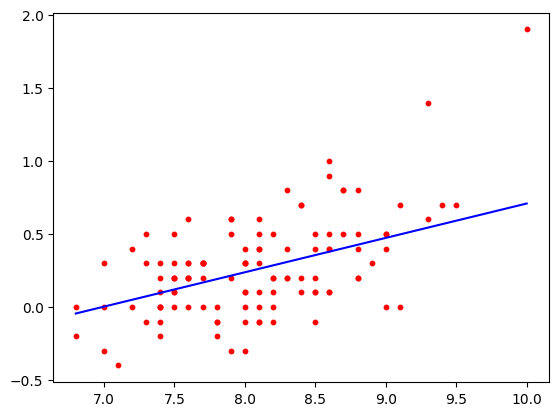

gamma =  0.23528209465152353 ± 0.016249539116757857
b =  -1.6441752393993776 ± 0.13085936347152868
delta =  0.2576707545444247


In [ ]:
#fitting of the galaxies with z>5 and MUV>-19
small_p,err_small_p=linear_fit(small_data['logMstar'],small_data['logSFR'],small_data['e_logSFR'])
plt.scatter(small_data['logMstar'],small_data['logSFR'],color='red',s=10)
#plt.errorbar(x,y,co_low,fmt='o',color='r')

b=float(small_p[0])
gamma=float(small_p[1])


k = np.linspace(min(small_data['logMstar']),max(small_data['logMstar']),100)
l =(k*gamma)+b


plt.plot(k, l, color='blue')



plt.show()
residual=small_data['logSFR']-((gamma*small_data['logMstar'])+b)
delta_sqrd=np.mean((residual**2)-(small_data['e_logSFR']**2))
print("gamma = ", gamma,'±', np.sqrt(err_small_p[1, 1]))
print("b = ", b ,'±', np.sqrt(err_small_p[0, 0]))
delta=np.sqrt(delta_sqrd)
print("delta = ", delta)


In [ ]:
!pip install emcee
!pip install corner
!pip install multiprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import emcee
import corner

import multiprocessing

In [ ]:
# Function for Luminosity Distance in m in Flat LCDM

def Dl_LCDM(z, Omega_m):
    c = 299792.458
    H0 = 70
    Ez_inv = lambda zp: 1.0 / np.sqrt(Omega_m * (1 + zp) ** 3 + (1 - Omega_m))
    integral, _ = integrate.quad(Ez_inv, 0, z)
    return (c / H0) * (1 + z) * integral*3.086*(10**22)

np.log10(4*np.pi*Dl_LCDM(13.2, 0.3)**2)

56.383017381048504

In [ ]:
def Phi(logM_star_prime, DL, beta, gamma):

    DL = np.array(DL)  # Convert to numpy array if not already
    return beta + (gamma * logM_star_prime) + ((- 1) * (2 * np.log10(DL) + np.log10(4*np.pi)))


In [ ]:
# Log-likelihood function from Equation (5)
def log_likelihood(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err):
    beta, gamma, delta, Omega_m = theta


    if not (0.2 < Omega_m < 0.4):
        return -np.inf


    # Parallelized computation of Dl values
    Dl_vals = np.array([Dl_LCDM(z, Omega_m) for z in z_obs])
    logSFR_model = Phi(logM_star_prime_obs, Dl_vals, beta, gamma)


    s2 = logSFR_err**2 + (gamma**2) * logM_star_err**2 + delta**2


    logL = -0.5 * np.sum((abs(logSFR_prime_obs - logSFR_model) ** 2 / s2) + np.log(2 * np.pi * s2))

    return logL

In [ ]:
# Define log-prior function
def log_prior(theta):
    beta, gamma, delta, Omega_m = theta


    if -3 < beta < 0 and 0 < gamma <  2 and 0 < delta < 2 and 0.2 < Omega_m < 0.5:
        return 0.0  # Flat priors
    return -np.inf


In [ ]:
def log_posterior(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err)


2
Running MCMC...


100%|██████████| 5000/5000 [19:44<00:00,  4.22it/s]


Best-fit parameters:
β = -1.914, γ = 0.367, δ = 0.298, Ωm = 0.317


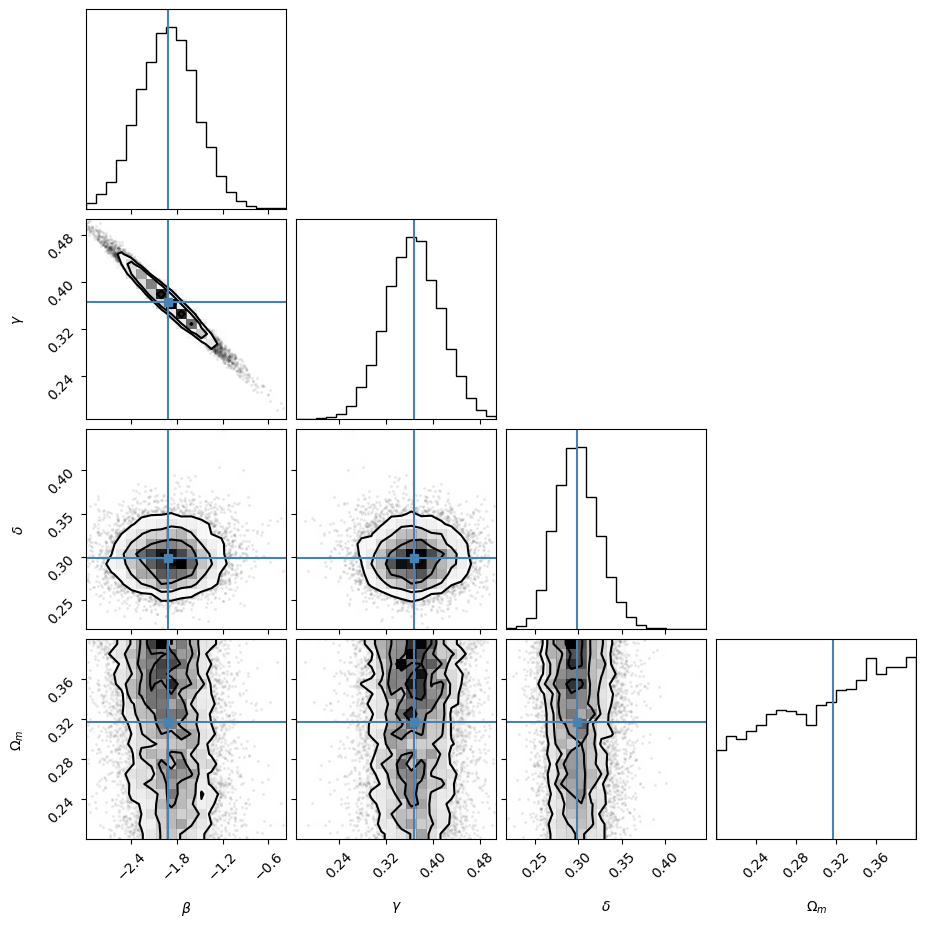

Autocorrelation time: [61.87388265 61.22934288 51.99620459 62.23709273]
Effective Sample Size: 134.82964869697085


In [ ]:

c = 299792.458
H0 = 70
log4pi = np.log10(4 * np.pi)

z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.3) for z in z_obs])
logSFR_prime_obs = small_data['logSFR_dash']
logM_star_prime_obs = small_data['logMstar']
logSFR_err = small_data['e_logSFR']
logM_star_err =  small_data['e_logMstar']


ndim = 4
nwalkers = 20
nsteps = 5000


#p0 = np.random.uniform([-1, 0.1, 0, 0.1], [-2, 0.5, 1, 0.5], size=(nwalkers, ndim))
p0 = np.random.normal(loc=[-1.6441752393993776,  0.23528209465152353, 0.2576707545444247, 0.3], scale=[0.1, 0.05, 0.05, 0.05], size=(nwalkers, ndim))
n_threads = multiprocessing.cpu_count()
print(n_threads)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior,
    args=(logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err)
)

print("Running MCMC...")
sampler.run_mcmc(p0, nsteps, progress=True)
samples = sampler.get_chain(discard=1000, thin=10, flat=True)

best_fit_params = np.median(samples, axis=0)
beta_best, gamma_best, delta_best, Omega_m_best = best_fit_params

print(f"Best-fit parameters:")
print(f"β = {beta_best:.3f}, γ = {gamma_best:.3f}, δ = {delta_best:.3f}, Ωm = {Omega_m_best:.3f}")

# Corner plot of the posterior distribution
fig = corner.corner(samples, labels=[r"$\beta$", r"$\gamma$", r"$\delta$", r"$\Omega_m$"], truths=best_fit_params)
plt.show()
try:
    tau = sampler.get_autocorr_time()
    print(f"Autocorrelation time: {tau}")
    print(f"Effective Sample Size: {len(samples) / np.mean(tau)}")
except:
    print("Autocorrelation time estimation failed. The chain may not have converged.")


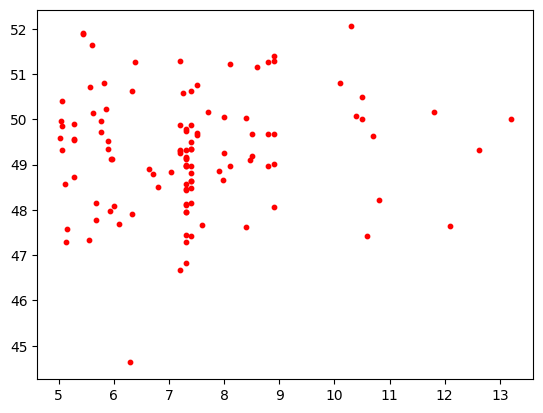

In [ ]:
z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.317) for z in z_obs])
f=small_data['logSFR_dash']-(0.367*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.914-(0.367-1)*np.log10(4*np.pi)
#f=small_data['logSFR_dash']-(0.189*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+0.419-(0.180-1)*np.log10(4*np.pi)
f=f-((0.367-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/(0.367-1))+25
plt.scatter(z_obs,dm,color='red',s=10)

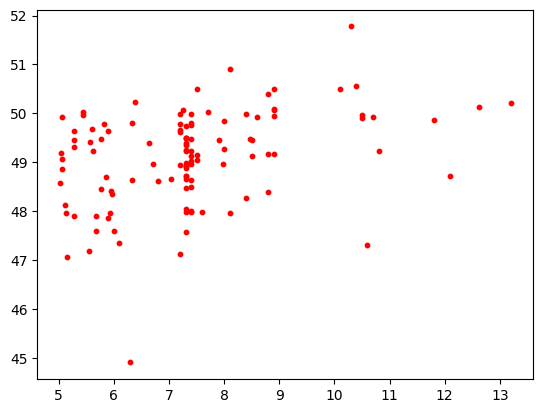

In [ ]:
z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.313) for z in z_obs])
f=small_data['logSFR_dash']-( 0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-( 0.23-1)*np.log10(4*np.pi)
f=small_data['logSFR']-np.log10(4*np.pi*DL_obs**2)-(0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-(0.23-1)*np.log10(4*np.pi)
f=f-(( 0.23-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/( 0.23-1))+25
plt.scatter(z_obs,dm,color='red',s=10)

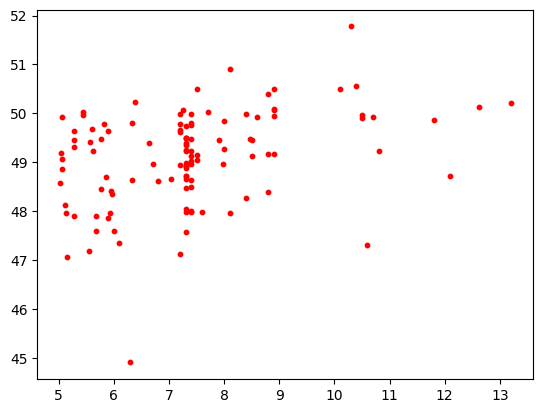

In [ ]:
z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.313) for z in z_obs])
f=small_data['logSFR_dash']-( 0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-( 0.23-1)*np.log10(4*np.pi)
f=small_data['logSFR']-np.log10(4*np.pi*DL_obs**2)-(0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-(0.23-1)*np.log10(4*np.pi)
f=f-(( 0.23-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/( 0.23-1))+25
plt.scatter(z_obs,dm,color='red',s=10)

In [ ]:
small_data['logSFR']-np.log10(4*np.pi*DL_obs**2)

<Column name='logSFR' dtype='float64' unit='dex(Msun / yr)' description='log, star formation rate, solar units per year' length=114>
 -53.73740992344201
 -54.98825348729394
 -55.01413208106467
 -54.92965926652812
 -55.65892482318259
 -56.05010488745301
-55.558924823182586
-55.558924823182586
 -55.84219020393921
-54.709472745029004
 -55.20762242122043
-55.548791488249854
                ...
 -56.42660668781826
-55.384577280488934
 -55.94552670500718
  -54.7548461771111
-55.645526705007185
-55.673213009644506
-55.826441594928944
 -55.93611415681815
 -55.96002478000812
 -56.00729933152098
 -56.06946986996714

In [ ]:
small_data['logSFR_dash']-(small_data['logSFR']-np.log10(4*np.pi*DL_obs**2))

<Column name='logSFR_dash' dtype='float64' unit='mag' description='apparent UV magnitude' length=114>
 0.9379379591202479
 0.6359815229721733
 1.0198601167429118
 1.0553873022063485
 0.7850528588608299
0.49863292313124674
 0.8446528588608189
 0.7658528588608249
 0.5707182396174417
 0.7940007807072433
 0.6153504568986676
 0.3181195239280896
                ...
 0.8347347234964957
 1.0691053161671675
 0.5944547406854142
 0.8033742127893362
 0.9328547406854213
 1.0001410453227493
  1.072969630607183
 1.0230421924963835
 0.6493528156863562
 0.7754273671992209
 0.7979979056453743